# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [6]:
%matplotlib inline
import pandas as pd
from scipy.stats.mstats import normaltest
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('C:\Users\Danny Arenson\Downloads\human_body_temperature.xls')

In [12]:
df.dtypes

temperature    float64
gender          object
heart_rate     float64
dtype: object

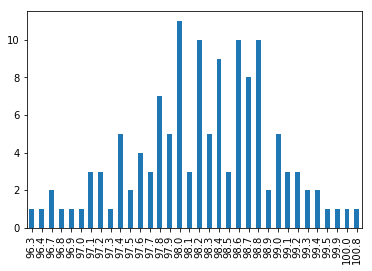

In [7]:
(df.temperature).value_counts().sort_index().plot(kind='bar')

plt.figure()

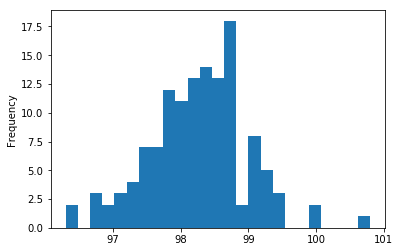

In [16]:
plt.figure();

df.temperature.plot.hist(stacked=True, bins=25)

In [10]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


1) Is the distribution of body temperatures normal?

At first glance, when looking at the sample distribution on a graph it doesnt appear to have a normal distribution. To find out if the distribution of body temperatures is normal, I did a p-test to test for normality. 

H0: Distribution is normal
HA: Distribution is not normal


In [17]:
#1) Is the distribution of body temperatures normal? 

print ('p-value:', normaltest(df.temperature)[1])


('p-value:', 0.2587479863488254)


p-value is ~26% which indicates weak evidence against the null hypothesis. So we fail to reject the null hypothesis, making this indicate that the distribution is normal.

2) Is the sample size large? Are the observations independent? 

The sample size (n) is > 30, which indicates it is large enough.
We can see that observations are independent because each variable (temperature, heartbeat, etc...) belongs to an individual person and is independent from any other person, making these observations independent.


3) Is the true population mean really 98.6 degrees F? 
Would you use a one-sample or two-sample test? Why? 
In this situation, is it appropriate to use the t or z statistic?
Now try using the other test. How are the results different? Why?



Because n > 30 we would typically use a Z-test 
H0: mean is 98.6 degrees F
HA: mean is not 98.6 degrees F

I will use a significance level of 0.05 

In [18]:
#Z-test
from statsmodels.stats.weightstats import ztest
ztest(df.temperature,value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

4.9021570141012155e-08 is less than the chosen significance level, making us reject the null hypothesis that the true mean is 98.6 F

4) At what temperature should we consider someone's temperature to be "abnormal"? 

Start by computing the margin of error and confidence interval.

In [24]:
#confidence interval
df_mean = np.mean(df.temperature)
df_sd = np.std(df.temperature)
se = df_sd/np.sqrt(len(df))
me = 1.96*se
confidence_interval = [df_mean-me,df_mean+me]

print(confidence_interval)

[98.123679804428193, 98.374781734033363]


In [25]:
#margin of error
stats.norm.interval(.95,loc=df_mean,scale=df_sd/np.sqrt(len(df)))

(98.123682111456645, 98.37477942700491)

These intervals are very similar, but if look closely, start to differ after 4 decimal places. If the temperature goes beyond the ten thousandths place then that is when we consider the temperature to be "abnormal".

5) Is there a significant difference between males and females in normal temperature? 
What test did you use and why? 
Write a story with your conclusion in the context of the original problem. 

In [26]:
females = np.array(df.temperature[df.gender=='F'])
males = np.array(df.temperature[df.gender=='M'])

print(len(males))
print(len(females))

65
65


In [31]:
males.mean(),females.mean()

(98.104615384615371, 98.393846153846141)

Both male and female samples are still > 30, but since we do not know the standard deviations of the populations I will use a t-test.

In [32]:
#T-test
stats.ttest_ind(females,males)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

This is a small p-value, indicating stong evidence against the null hypothesis, so we will reject the null hypothesis. We can conclude that there is a significant difference between normal temperatures of females and males.

Conclusions:

1. The distribution of body temperature overall is considered to be normal.

2. If someone's temprature is less than 98.38 degrees or greater than 98.12 it should be considered abnormal.

3. There is a significant difference between the male population temperature and the female population temperature. Females tend to have a higher body temperature than males.